In [1]:
!pip install wordcloud
!pip install imblearn
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scipy


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi

from sklearn.impute import KNNImputer #imputasi
from sklearn.preprocessing import StandardScaler #scaling
from imblearn.over_sampling import SMOTE #oversampling
from wordcloud import WordCloud #visualisasi kata

In [5]:
data = pd.read_csv('diabetes.csv')

In [6]:
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0          6.0      NaN           72.0           35.0      0.0   NaN   
 1          1.0     85.0           66.0           29.0      0.0   NaN   
 2          8.0    183.0           64.0            0.0      0.0  23.3   
 3          1.0     89.0           66.0           23.0     94.0  28.1   
 4          0.0      NaN           40.0           35.0    168.0  43.1   
 
    DiabetesPedigreeFunction   Age  Outcome  
 0                     0.627   NaN        1  
 1                     0.351  31.0        0  
 2                     0.672  32.0        1  
 3                     0.167  21.0        0  
 4                       NaN  33.0        1  ,
 None)

In [7]:
# Langkah 1: Mengimputasi nilai yang hilang (missing values) dengan mean, median, dan modus
data_imputed = data.copy()

In [8]:
# Untuk setiap kolom, kita akan mengimputasi nilai yang hilang menggunakan mean, median, dan modus
for kolom in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    mean_value = data_imputed[kolom].mean()  # menghitung nilai rata-rata
    median_value = data_imputed[kolom].median()  # menghitung nilai tengah
    mode_value = data_imputed[kolom].mode()[0]  # mendapatkan modus
    
    # Imputasi menggunakan mean, median, dan modus
    data_imputed[kolom].fillna(mean_value, inplace=True)  # imputasi dengan mean
    data_imputed[kolom].fillna(median_value, inplace=True)  # imputasi dengan median
    data_imputed[kolom].fillna(mode_value, inplace=True)  # imputasi dengan modus

C:\Users\arsit\AppData\Local\Temp\ipykernel_25476\2231871921.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_imputed[kolom].fillna(mean_value, inplace=True)  # imputasi dengan mean
C:\Users\arsit\AppData\Local\Temp\ipykernel_25476\2231871921.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [9]:
data_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,120.462481,72.0,35.0,0.0,31.99368,0.627000,33.166124,1
1,1.0,85.000000,66.0,29.0,0.0,31.99368,0.351000,31.000000,0
2,8.0,183.000000,64.0,0.0,0.0,23.30000,0.672000,32.000000,1
3,1.0,89.000000,66.0,23.0,94.0,28.10000,0.167000,21.000000,0
4,0.0,120.462481,40.0,35.0,168.0,43.10000,0.465363,33.000000,1


In [10]:
matriks_korelasi = data_imputed.corr()


In [11]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Axes: >

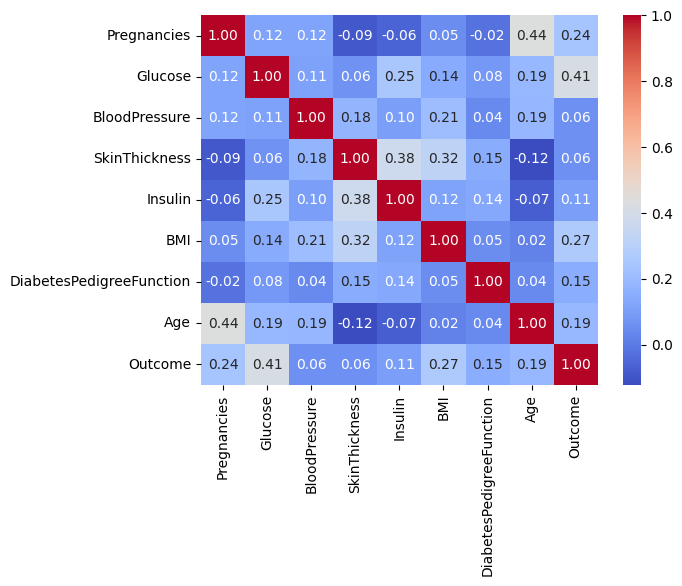

In [12]:
# Membuat heatmap
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt='.2f')

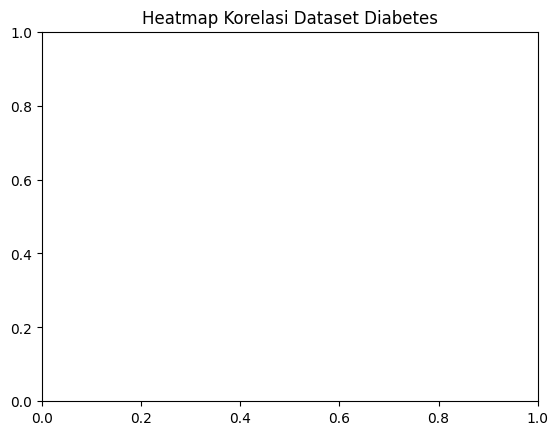

In [13]:
# Menampilkan heatmap
plt.title('Heatmap Korelasi Dataset Diabetes')
plt.show()

In [14]:
# Langkah 3: Mengatasi masalah class imbalance menggunakan undersampling
# Cek distribusi variabel 'Outcome' untuk memahami ketidakseimbangan kelas
hitung_kelas = data_imputed['Outcome'].value_counts()
print(hitung_kelas)

Outcome
0    500
1    268
Name: count, dtype: int64


In [15]:
# Melakukan undersampling
from imblearn.under_sampling import RandomUnderSampler


In [16]:
# Pisahkan fitur dan target
X = data_imputed.drop('Outcome', axis=1)
y = data_imputed['Outcome']


In [17]:
# Buat objek undersampler
undersampler = RandomUnderSampler(random_state=42)

In [18]:
# Melakukan undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [19]:
# Langkah 4: Melakukan scaling dengan RobustScaler dan MinMaxScaler
from sklearn.preprocessing import RobustScaler, MinMaxScaler


In [20]:
# Inisialisasi scaler
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()


In [21]:
X_rescaled_robust = robust_scaler.fit_transform(X_resampled)

In [22]:
X_rescaled_minmax = minmax_scaler.fit_transform(X_resampled)

In [24]:
print("Data setelah scaling dengan RobustScaler:", X_rescaled_robust[:5])


Data setelah scaling dengan RobustScaler: [[-0.56063676 -0.71098427  0.08672638  0.5625      0.          0.
  -0.59030218 -0.26384365]
 [ 0.23936324  0.         -1.74660695 -0.6875     -0.80712307  0.41617554
   0.63527758 -0.68051031]
 [-0.16063676 -0.28674184 -0.91327362  0.28125    -0.34518081 -0.60821471
   0.00562193 -0.93051031]
 [-0.36063676  0.2587127   1.25339305 -0.6875     -0.80712307 -0.97406837
  -0.40477864 -0.51384365]
 [ 0.63936324 -0.55946912  0.42005972  0.5625      0.          1.26983407
  -0.62965566  0.        ]]


In [25]:
print("Data setelah scaling dengan MinMaxScaler:", X_rescaled_minmax[:5])

Data setelah scaling dengan MinMaxScaler: [[0.05882353 0.48743719 0.61403509 0.4040404  0.14158098 0.47680597
  0.0596882  0.17647059]
 [0.29411765 0.6053391  0.42105263 0.         0.         0.50223547
  0.25389755 0.07843137]
 [0.17647059 0.55778894 0.50877193 0.31313131 0.08103131 0.43964232
  0.15412027 0.01960784]
 [0.11764706 0.64824121 0.73684211 0.         0.         0.41728763
  0.08908686 0.11764706]
 [0.41176471 0.51256281 0.64912281 0.4040404  0.14158098 0.55439642
  0.05345212 0.23855145]]
